In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import math

In [49]:
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

def log_binning(X,Y,num_intervals):
    avrgY = []
    avrgX = []
    fin = []
    XY = list(zip(X,Y))
    l1 = np.logspace(orderOfMagnitude(np.min(X)), orderOfMagnitude(np.max(X)), num=num_intervals)
    l2 = np.log10(l1)
    for n in range(1,num_intervals):
        sum = 0
        count = 0
        for indx, e in enumerate(XY, start=1):
            if (e[0] < l1[n]) and (e[0] >= l1[n-1]) and (not math.isnan(e[1])):
                count +=1
                sum += e[1]
        if count!=0:
            avrgY.append(sum/count)
        else:
            avrgY.append(0)

        avrgX.append(10**((l2[n]+l2[n-1])/2))
    fin = [avrgX,avrgY,l1]
    return fin

#(0,0),(0,1),(0,2),(0,3),(0,4),(0,5)
#(1,0),(1,1),(1,2),(1,3),(1,4),(1,5)
#(2,0),(2,1),(2,2),(2,3),(2,4),(2,5)
#...
def subplots(X1, X2, sizesub, deg = 1):
    COEF = []
    RES = []
    Pi = X1.columns.append(X2.columns)
    if list(X2.columns)[0][-1] == "h":
        keyword = "Homicide"
    else:
        keyword = "Suicide"

    DataBase = [log_binning(X1[Pi[i]], X2[Pi[i+26]], 14) for i in range(int(len(Pi)/2))]
    plt.figure(figsize=(16, 32))
    count = 1
    excpt = 1
    for Z in DataBase:
        x = np.array(Z[0][2:])
        y = np.array(Z[1][2:])
        while y[0] == 0:
            x = np.array(Z[0][2+excpt:])
            y = np.array(Z[1][2+excpt:])
            excpt+=1
        coefs = np.polyfit(np.log10(x), np.log10(y), deg, full=True)
        #pred_f = coefs[1] + np.multiply(sorted(np.log10(x)), coefs[0])
        yn = np.poly1d(coefs[0])
        plt.subplot(sizesub[0], sizesub[1], count)
        #print("Z[0]: ", Z[0], "\nZ[1]: ", Z[1])
        plt.scatter(np.log10(X1[Pi[count-1]]), np.log10(X2[Pi[(count-1)+26]]))
        plt.scatter(np.log10(x), np.log10(y), s = 130, edgecolors="black")
        for k in range(2, len(Z[2]),1):
            plt.axvline(np.log10(Z[2][k]), alpha=0.7)
        plt.plot(sorted(np.log10(x)), yn(np.log10(x)), 'k--')

        plt.title("{} {}".format(keyword, list(X2.columns)[count-1][:-2]))
        count +=1
        excpt=1
        COEF.append(coefs[0])
        RES.append(coefs[1][0])

    plt.show()
    return (COEF, RES)



In [50]:
pop_muni_br = pd.read_csv("Brasil-Populacao/BR-Populacao-Muni.csv", sep=",")
lat_muni_br = pd.read_csv("Brasil-Populacao/BR-Latitude-Muni.csv", sep=",")
long_muni_br = pd.read_csv("Brasil-Populacao/BR-Longitude-Muni.csv", sep=",")
hom_muni_br = pd.read_csv("Brasil-Homicidios/BR-Homicidios-Muni.csv",sep=",")
suic_muni_br = pd.read_csv("Brasil-Suicidios/BR-Suicidios-Muni.csv",sep=",")

In [51]:
lat_muni_br.rename(columns={"1998":"Latitude"}, inplace=True)
long_muni_br.rename(columns={"1998":"Longitude"}, inplace=True)

## População por município

In [52]:
pop_muni_br.rename(columns={'1992': '1992_p', '1993': '1993_p', '1994': '1994_p', '1995': '1995_p', '1997': '1997_p', '1998': '1998_p', '1999': '1999_p', '2000': '2000_p', '2001': '2001_p', '2002': '2002_p', '2003': '2003_p', '2004': '2004_p', '2005': '2005_p', '2006': '2006_p', '2008': '2008_p', '2009': '2009_p', '2011': '2011_p', '2012': '2012_p', '2013': '2013_p', '2014': '2014_p', '2015': '2015_p', '2016': '2016_p', '2017': '2017_p', '2018': '2018_p', '2019': '2019_p', '2020': '2020_p'}, inplace=True)
pop_muni_br

,Sigla,Código,Município,1992_p,1993_p,1994_p,1995_p,1997_p,1998_p,1999_p,...,2011_p,2012_p,2013_p,2014_p,2015_p,2016_p,2017_p,2018_p,2019_p,2020_p
0,AC,1200013,Acrelândia,5688.0,5858.0,6036.0,6211.0,6536.0,6730.0,6922.0,...,12779.0,13011.0,13353.0,13613.0,13869.0,14120.0,14366.0,15020.0,15256.0,15490.0
1,AC,1200054,Assis Brasil,3017.0,3182.0,3302.0,3419.0,2918.0,2918.0,2919.0,...,6192.0,6308.0,6480.0,6610.0,6738.0,6863.0,6986.0,7300.0,7417.0,7534.0
2,AC,1200104,Brasiléia,14353.0,14737.0,15076.0,15406.0,13946.0,13938.0,13930.0,...,21837.0,22261.0,22899.0,23378.0,23849.0,24311.0,24765.0,25848.0,26278.0,26702.0
3,AC,1200138,Bujari,3294.0,3401.0,3501.0,3599.0,4392.0,4641.0,4888.0,...,8629.0,8782.0,9003.0,9173.0,9339.0,9503.0,9664.0,10111.0,10266.0,10420.0
4,AC,1200179,Capixaba,2367.0,2418.0,2465.0,2512.0,3109.0,3286.0,3460.0,...,9088.0,9368.0,9836.0,10170.0,10498.0,10820.0,11136.0,11456.0,11733.0,12008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,TO,1721208,Tocantinópolis,21041.0,21116.0,21144.0,21265.0,19397.0,19914.0,20435.0,...,22607.0,22596.0,23165.0,23153.0,23141.0,23130.0,23119.0,22896.0,22870.0,22845.0
5592,TO,1721257,Tupirama,NaN,NaN,NaN,NaN,1103.0,1116.0,1128.0,...,1605.0,1634.0,1718.0,1751.0,1782.0,1813.0,1843.0,1860.0,1891.0,1922.0
5593,TO,1721307,Tupiratins,1198.0,1180.0,1162.0,1145.0,1351.0,1384.0,1416.0,...,2154.0,2208.0,2342.0,2402.0,2461.0,2518.0,2574.0,2613.0,2671.0,2729.0
5594,TO,1722081,Wanderlândia,9427.0,9552.0,9685.0,9815.0,10611.0,10894.0,11178.0,...,11036.0,11088.0,11450.0,11509.0,11566.0,11622.0,11677.0,11631.0,11683.0,11734.0


## Homicídio por município

In [53]:
hom_muni_br.drop(["1996","2007","2010"],inplace=True, axis=1)
hom_muni_br.rename(columns={'1992': '1992_h', '1993': '1993_h', '1994': '1994_h', '1995': '1995_h', '1997': '1997_h', '1998': '1998_h', '1999': '1999_h', '2000': '2000_h', '2001': '2001_h', '2002': '2002_h', '2003': '2003_h', '2004': '2004_h', '2005': '2005_h', '2006': '2006_h', '2008': '2008_h', '2009': '2009_h', '2011': '2011_h', '2012': '2012_h', '2013': '2013_h', '2014': '2014_h', '2015': '2015_h', '2016': '2016_h', '2017': '2017_h', '2018': '2018_h', '2019': '2019_h', '2020': '2020_h'}, inplace=True)
hom_muni_br

,Sigla,Código,Município,1992_h,1993_h,1994_h,1995_h,1997_h,1998_h,1999_h,...,2011_h,2012_h,2013_h,2014_h,2015_h,2016_h,2017_h,2018_h,2019_h,2020_h
0,AC,1200013,Acrelândia,NaN,NaN,2.0,1.0,NaN,NaN,1.0,...,2.0,1.0,4.0,4.0,3.0,7.0,5.0,5.0,5.0,1.0
1,AC,1200054,Assis Brasil,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,2.0,NaN,1.0,2.0,4.0,8.0,2.0,NaN
2,AC,1200104,Brasiléia,1.0,NaN,2.0,1.0,1.0,NaN,NaN,...,7.0,4.0,7.0,7.0,3.0,8.0,9.0,7.0,7.0,11.0
3,AC,1200138,Bujari,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,5.0,5.0,2.0,4.0,2.0,8.0
4,AC,1200179,Capixaba,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,3.0,2.0,1.0,4.0,3.0,5.0,11.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,TO,1721208,Tocantinópolis,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,8.0,5.0,1.0,4.0,8.0,7.0,7.0,5.0,8.0,8.0
5592,TO,1721257,Tupirama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
5593,TO,1721307,Tupiratins,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0
5594,TO,1722081,Wanderlândia,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,6.0,3.0,3.0,4.0,2.0,9.0,6.0,5.0,3.0,2.0


## Suicídio por município

In [54]:
suic_muni_br.drop(["1996","2007","2010"],inplace=True, axis=1)
suic_muni_br.rename(columns={'1992': '1992_s', '1993': '1993_s', '1994': '1994_s', '1995': '1995_s', '1997': '1997_s', '1998': '1998_s', '1999': '1999_s', '2000': '2000_s', '2001': '2001_s', '2002': '2002_s', '2003': '2003_s', '2004': '2004_s', '2005': '2005_s', '2006': '2006_s', '2008': '2008_s', '2009': '2009_s', '2011': '2011_s', '2012': '2012_s', '2013': '2013_s', '2014': '2014_s', '2015': '2015_s', '2016': '2016_s', '2017': '2017_s', '2018': '2018_s', '2019': '2019_s', '2020': '2020_s'}, inplace=True)
suic_muni_br

,Sigla,Código,Município,1992_s,1993_s,1994_s,1995_s,1997_s,1998_s,1999_s,...,2011_s,2012_s,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,2019_s,2020_s
0,AC,1200013,Acrelândia,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0
1,AC,1200054,Assis Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2,AC,1200104,Brasiléia,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,2.0,3.0,NaN,1.0,NaN,NaN,1.0,9.0,7.0
3,AC,1200138,Bujari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,2.0,1.0
4,AC,1200179,Capixaba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,TO,1721208,Tocantinópolis,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,3.0,2.0
5592,TO,1721257,Tupirama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
5593,TO,1721307,Tupiratins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
5594,TO,1722081,Wanderlândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0


In [55]:
dfs = [pop_muni_br,hom_muni_br,suic_muni_br, lat_muni_br,long_muni_br]
dfs = [df.set_index(["Município","Código","Sigla"]) for df in dfs]
DB = dfs[0].join(dfs[1:])

## Dataframe final

As colunas "Municipio", "Código" e "Sigla" são comuns, as restantes dependes do tipo de dados, onde os sufixos "_p","_h","_s", representam a população, homicídio e suicídio respetivamente.

In [56]:
DB

,,,1992_p,1993_p,1994_p,1995_p,1997_p,1998_p,1999_p,2000_p,2001_p,2002_p,...,2013_s,2014_s,2015_s,2016_s,2017_s,2018_s,2019_s,2020_s,Latitude,Longitude
Município,Código,Sigla,,,,,,,,,,,,,,,,,,,,,
Acrelândia,1200013,AC,5688.0,5858.0,6036.0,6211.0,6536.0,6730.0,6922.0,7115.0,8237.0,8454.0,...,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,-9.827778,66.883333
Assis Brasil,1200054,AC,3017.0,3182.0,3302.0,3419.0,2918.0,2918.0,2919.0,2919.0,3564.0,3611.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,-10.941389,69.566944
Brasiléia,1200104,AC,14353.0,14737.0,15076.0,15406.0,13946.0,13938.0,13930.0,13922.0,17384.0,17649.0,...,3.0,NaN,1.0,NaN,NaN,1.0,9.0,7.0,-11.016111,68.748056
Bujari,1200138,AC,3294.0,3401.0,3501.0,3599.0,4392.0,4641.0,4888.0,5135.0,6154.0,6382.0,...,NaN,2.0,1.0,NaN,2.0,NaN,2.0,1.0,-9.830556,67.952222
Capixaba,1200179,AC,2367.0,2418.0,2465.0,2512.0,3109.0,3286.0,3460.0,3635.0,5561.0,5814.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-10.572778,67.675556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tocantinópolis,1721208,TO,21041.0,21116.0,21144.0,21265.0,19397.0,19914.0,20435.0,20955.0,23433.0,23978.0,...,NaN,NaN,2.0,2.0,2.0,2.0,3.0,2.0,-6.329444,47.416389
Tupirama,1721257,TO,NaN,NaN,NaN,NaN,1103.0,1116.0,1128.0,1140.0,1202.0,1217.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,-8.972778,48.187778
Tupiratins,1721307,TO,1198.0,1180.0,1162.0,1145.0,1351.0,1384.0,1416.0,1448.0,1377.0,1395.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,-8.393889,48.115556


**Interpolating between log ticks: **What value is halfway between the tick for 10 and the one for 100 on a logarithmic axis? Your first guess might be the average of those two values, 55. But that is wrong. Values are not equally spaced on a logarithmic axis. The logarithm of 10 is 1.0, and the logarithm of 100 is 2.0, so the logarithm of the midpoint is 1.5. What value has a logarithm of 1.5? The answer is 101.5, which is 31.62. So the value half way between 10 and 100 on a logarithmic axis is 31.62. Similarly, the value halfway between 100 and 1000 on a logarithmic axis is 316.2.



In [57]:
P = DB.iloc[:, 0:26]
H = DB.iloc[:, 26:52]
S = DB.iloc[:, 52:78]
PHi = P.columns.append(H.columns)
PSi = P.columns.append(S.columns)
P.columns

Index(['1992_p', '1993_p', '1994_p', '1995_p', '1997_p', '1998_p', '1999_p',
       '2000_p', '2001_p', '2002_p', '2003_p', '2004_p', '2005_p', '2006_p',
       '2008_p', '2009_p', '2011_p', '2012_p', '2013_p', '2014_p', '2015_p',
       '2016_p', '2017_p', '2018_p', '2019_p', '2020_p'],
      dtype='object')

## Homicidios por ano

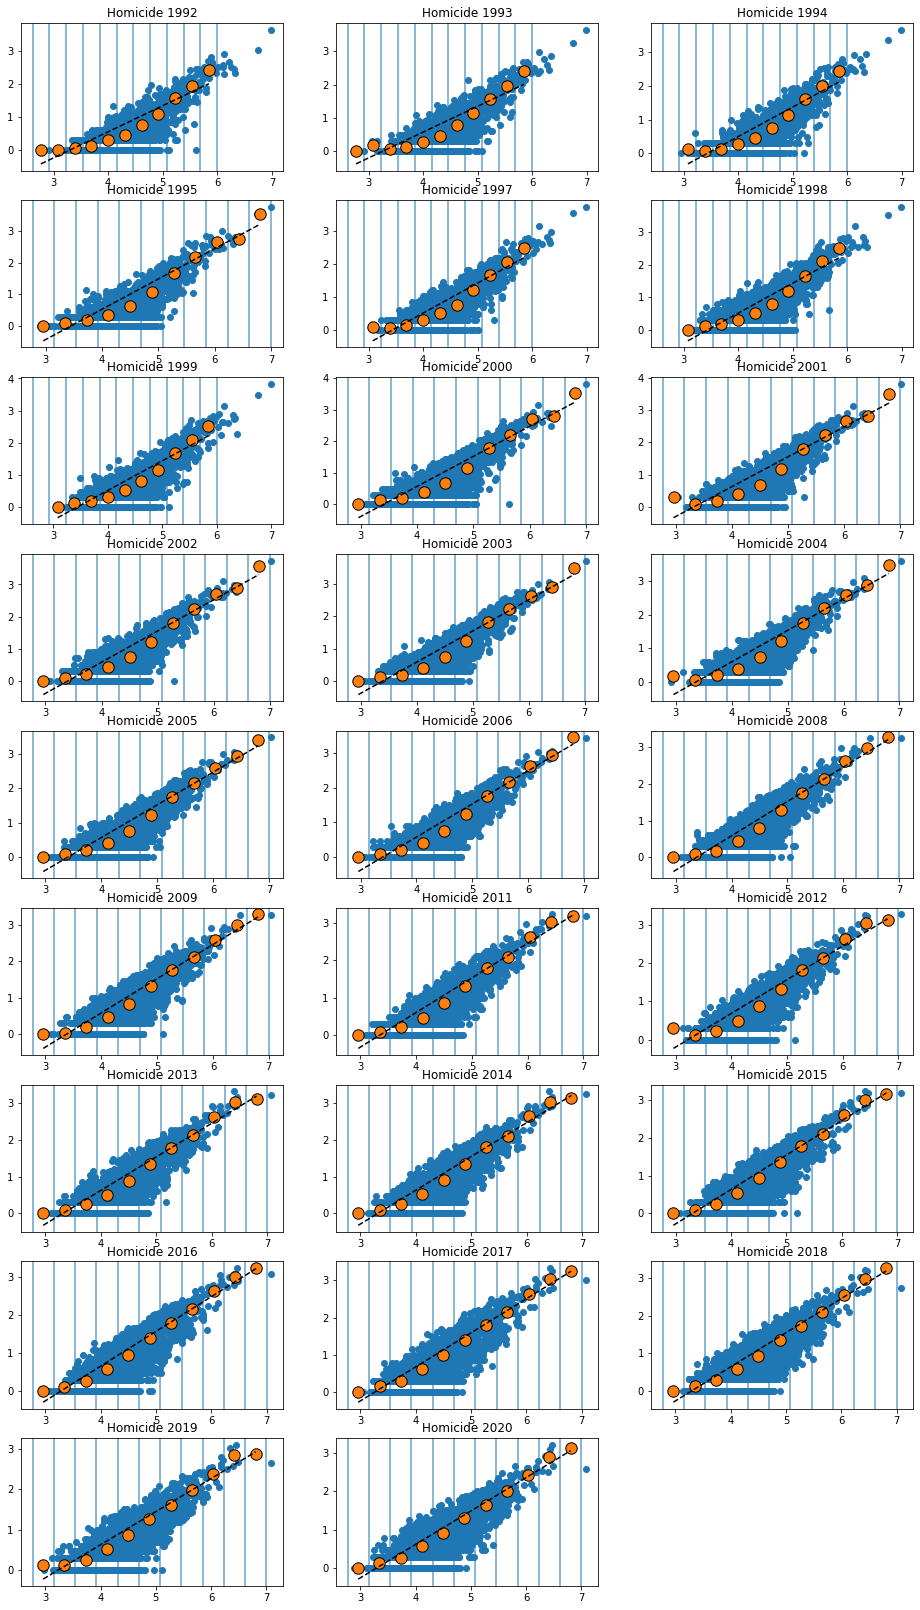

In [58]:
Y = subplots(P, H, (10,3),1)

## Fit of deg=2

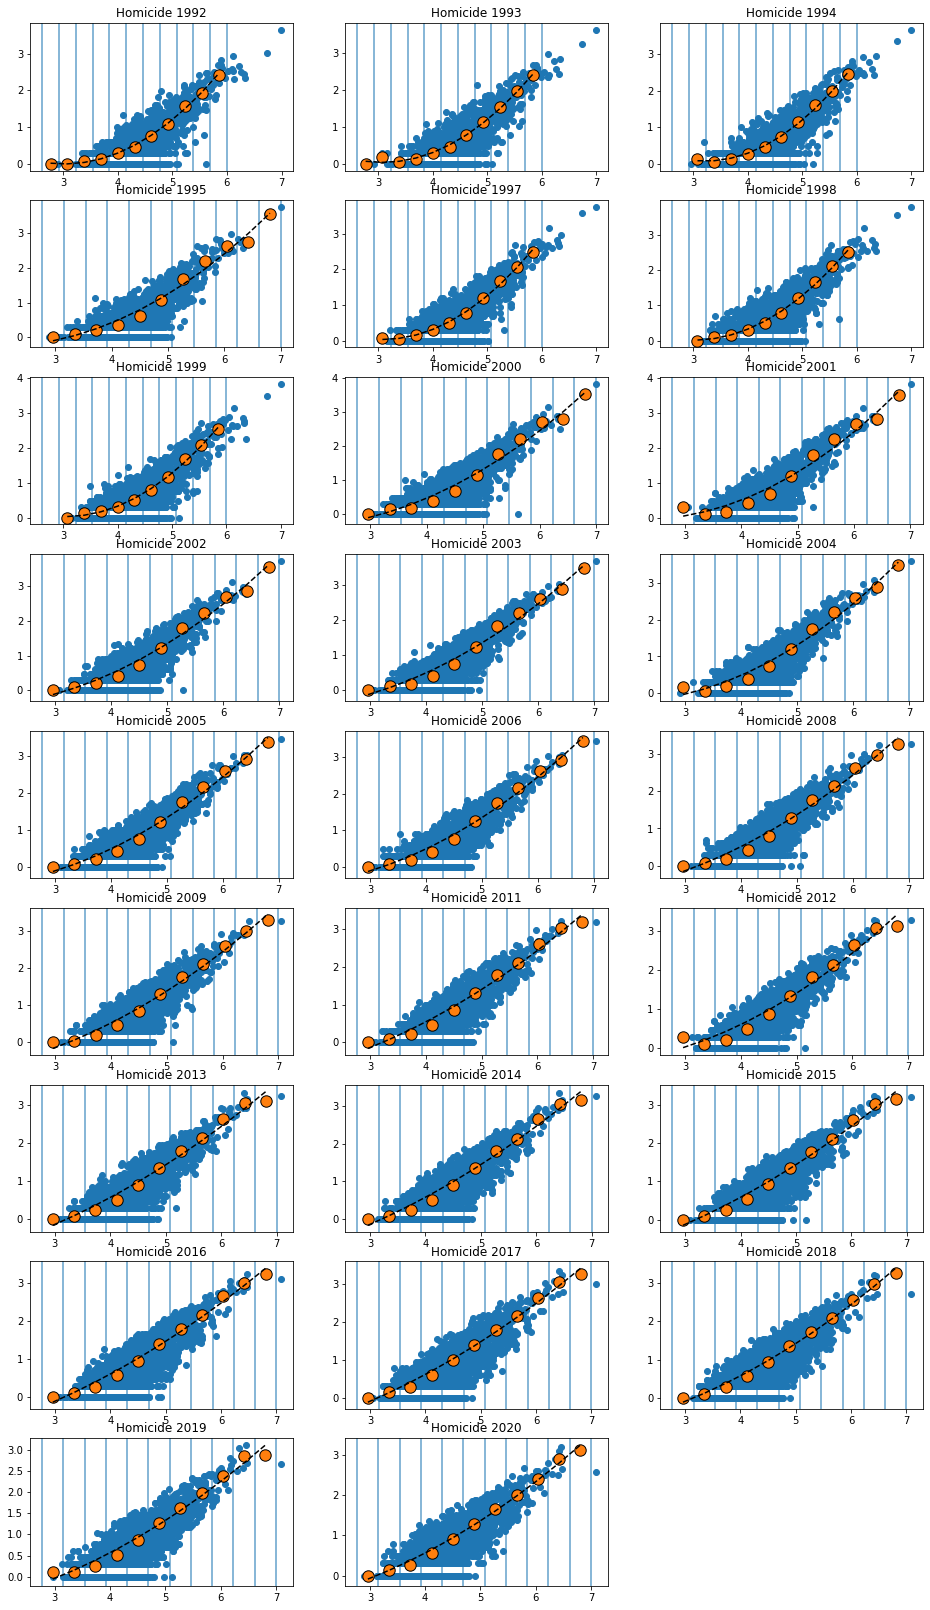

In [59]:
YY = subplots(P, H, (10,3),2)

## Suicidios por ano

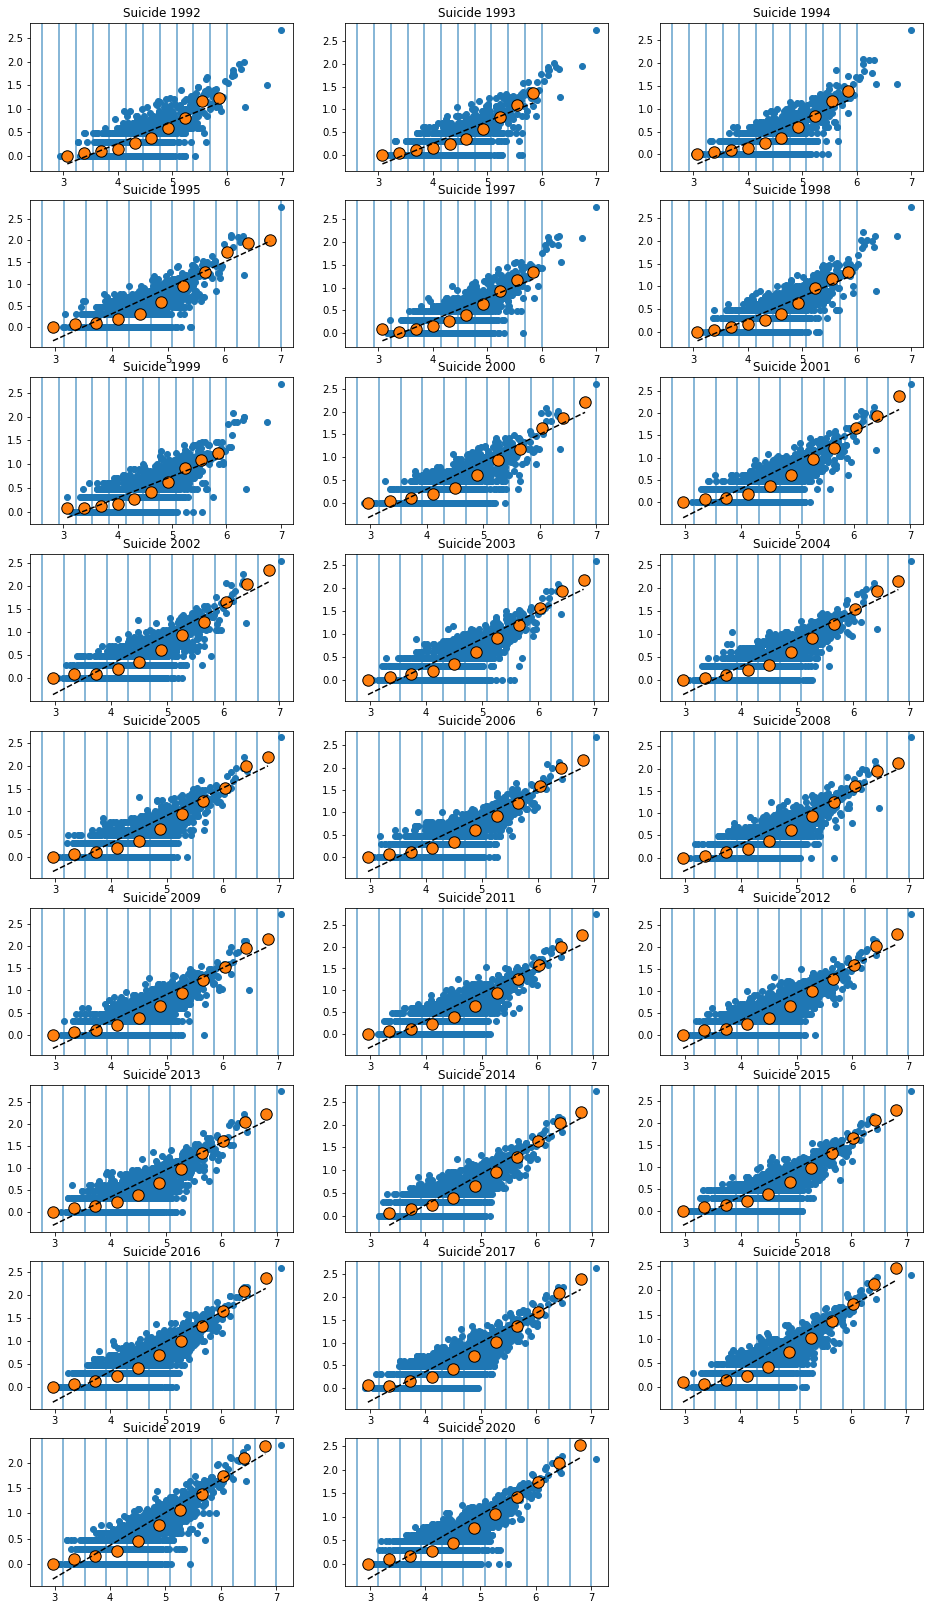

In [60]:
V = subplots(P, S, (10,3),1)

## Fit of deg=2

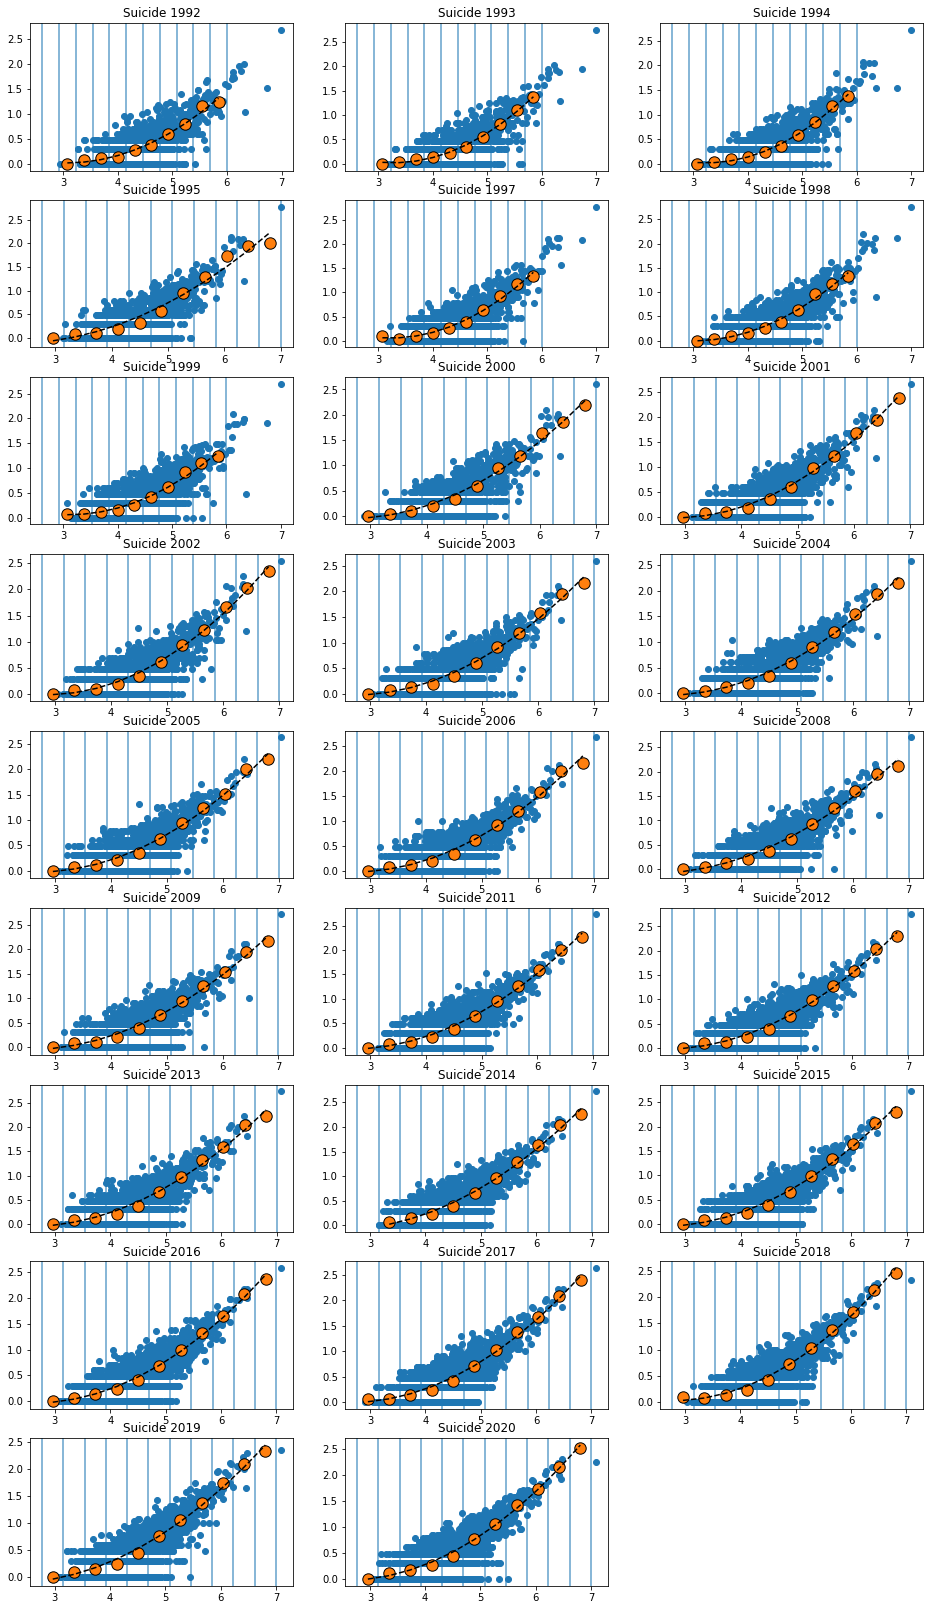

([array([ 0.16678912, -1.02134637,  1.58301074]), array([ 0.20510956, -1.34513076,  2.22844541]), array([ 0.20559744, -1.33283007,  2.18133372]), array([ 0.11171562, -0.49678943,  0.43295359]), array([ 0.19872575, -1.28584064,  2.13719696]), array([ 0.17272729, -1.03363798,  1.54178968]), array([ 0.16741147, -1.03984676,  1.67446049]), array([ 0.13377665, -0.70472014,  0.87968929]), array([ 0.15294483, -0.86229398,  1.20427755]), array([ 0.15618262, -0.89257786,  1.27062701]), array([ 0.13565186, -0.72916723,  0.95307184]), array([ 0.13237255, -0.69937496,  0.88270326]), array([ 0.13673849, -0.73205083,  0.95052727]), array([ 0.13714051, -0.7372527 ,  0.96462265]), array([ 0.12029932, -0.57726478,  0.61059241]), array([ 0.12474827, -0.62256141,  0.72145493]), array([ 0.13662014, -0.71945519,  0.91659333]), array([ 0.13750661, -0.72186651,  0.92314254]), array([ 0.13021331, -0.65471423,  0.77223064]), array([ 0.12818462, -0.62297549,  0.67046069]), array([ 0.13633996, -0.69824502,  0.84

In [61]:
VV = subplots(P, S, (10,3),2)
print(VV)

## Coeficients for homicide and suicide for fit deg=1, dividing line at x = 0.72, y=mx+k

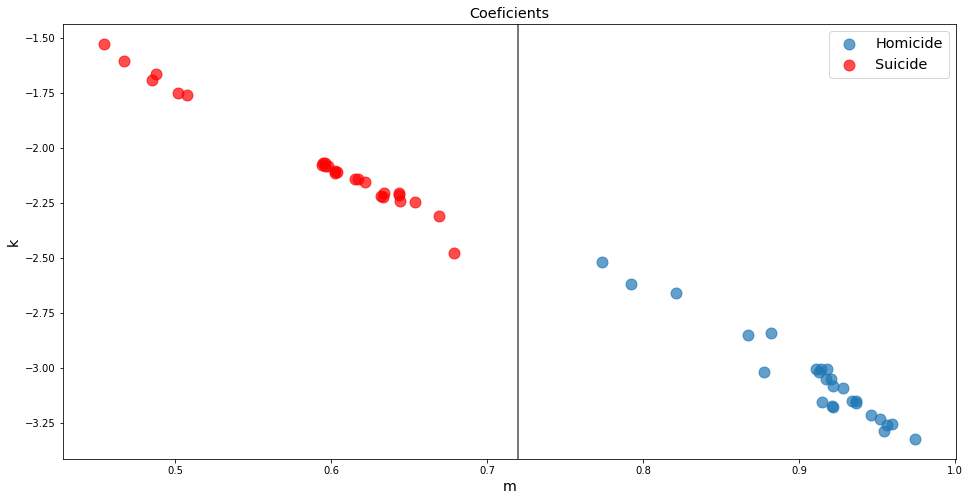

In [62]:
Y1, Y2 = [], []
V1, V2 = [], []
for c in Y[0]:
    Y1.append(c[0])
    Y2.append(c[1])
for c in V[0]:
    V1.append(c[0])
    V2.append(c[1])

plt.figure(figsize=(16, 8))

plt.scatter(Y1,Y2,s=120, alpha=0.7, label = "Homicide")
plt.scatter(V1,V2,s=120, alpha=0.7, color = "red", label = "Suicide")
plt.title("Coeficients", fontsize="x-large")
plt.xlabel("m", fontsize="x-large")
plt.ylabel("k", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.axvline(0.72, alpha=0.7, color = "black")
plt.show()

## Coeficients for homicide and suicide for fit deg=2, y = ax²+bx+c

In [63]:
YY1, YY2, YY3 = [], [], []
VV1, VV2, VV3 = [], [], []
for c in YY[0]:
    YY1.append(c[0])
    YY2.append(c[1])
    YY3.append(c[2])
for c in VV[0]:
    VV1.append(c[0])
    VV2.append(c[1])
    VV3.append(c[2])

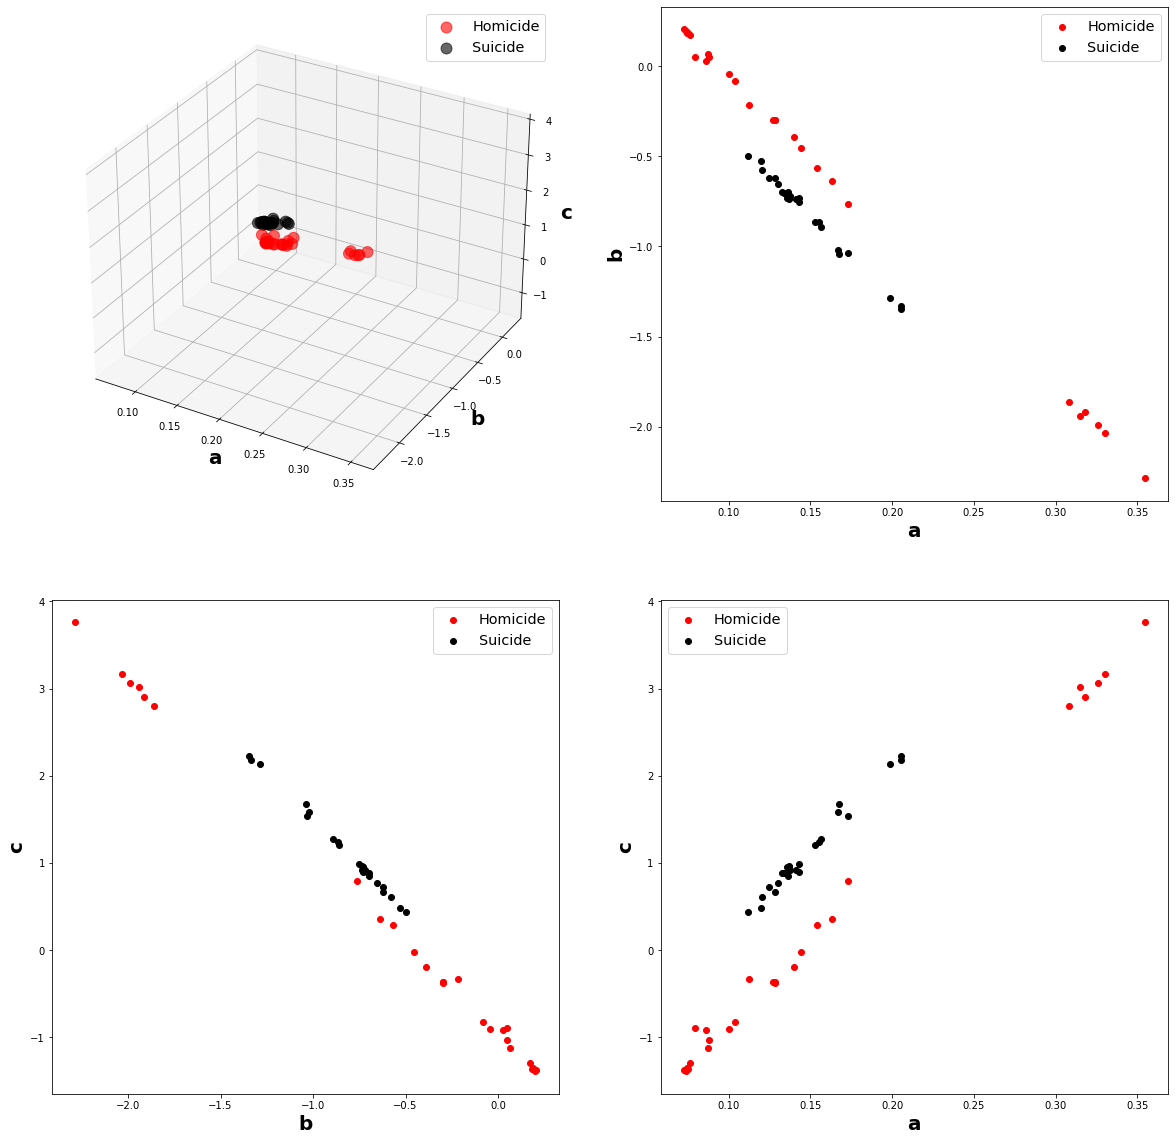

In [64]:
fig = plt.figure(figsize=(20, 20))


ax = fig.add_subplot(2,2,1,projection='3d')

ax.scatter3D(YY1,YY2,YY3, s=120, alpha=0.6, label="Homicide", color = "red")
ax.scatter3D(VV1,VV2,VV3, s=120, alpha=0.6, label="Suicide", color = "black")

ax.set_xlabel('a', fontweight ='bold', size = 20)
ax.set_ylabel('b', fontweight ='bold', size = 20)
ax.set_zlabel('c', fontweight ='bold', size = 20)
plt.legend(fontsize="x-large")

ax = fig.add_subplot(2,2,2)
ax.scatter(YY1,YY2, color='red',label = "Homicide")
ax.scatter(VV1,VV2, color='black', label = "Suicide")

ax.set_xlabel('a', fontweight ='bold', size = 20)
ax.set_ylabel('b', fontweight ='bold', size = 20)
plt.legend(fontsize="x-large")

ax = fig.add_subplot(2,2,3)
ax.scatter(YY2,YY3, color='red', label = "Homicide")
ax.scatter(VV2,VV3, color='black', label = "Suicide")

ax.set_xlabel('b', fontweight ='bold', size = 20)
ax.set_ylabel('c', fontweight ='bold', size = 20)
plt.legend(fontsize="x-large")

ax = fig.add_subplot(2,2,4)
ax.scatter(YY1,YY3, color='red', label = "Homicide")
ax.scatter(VV1,VV3, color='black', label = "Suicide")

ax.set_xlabel('a', fontweight ='bold', size = 20)
ax.set_ylabel('c', fontweight ='bold', size = 20)
plt.legend(fontsize="x-large")


plt.show()

Este primeiro cálculo é o ponto médio na escala normal, este não é de facto o ponto que fica no meio na escala log porque os valores não estão igualmente espaçados:

mid1 = (l1[1]+l1[0])/2

O segundo ponto médio, convertendo a logspace nos exponentes, calculando o ponto médio e convertendo de volta.

l2 = np.log10(l1)
mid2 = 10**((l2[1]+l2[0])/2)


## Residuals Homicide

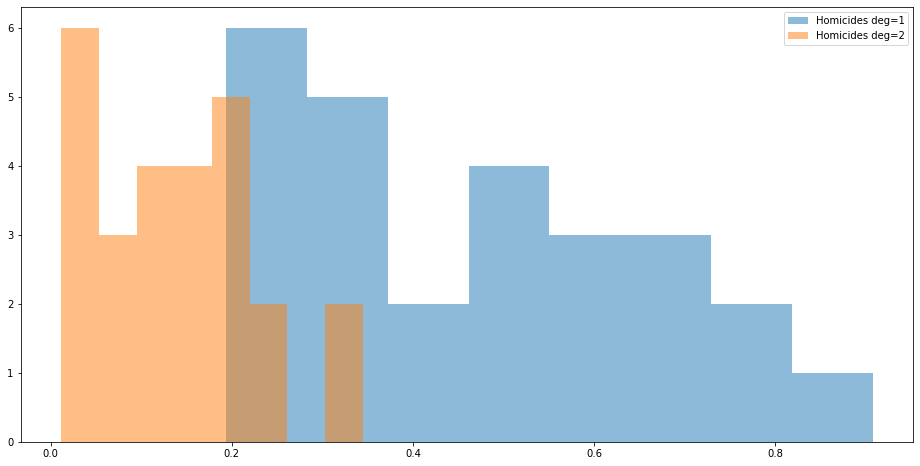

In [65]:
plt.figure(figsize=(16, 8))
bins = 8

plt.hist(Y[1], bins, alpha=0.5, label='Homicides deg=1')
plt.hist(YY[1], bins, alpha=0.5, label='Homicides deg=2')
plt.legend()
plt.show()

## Residuals Suicide

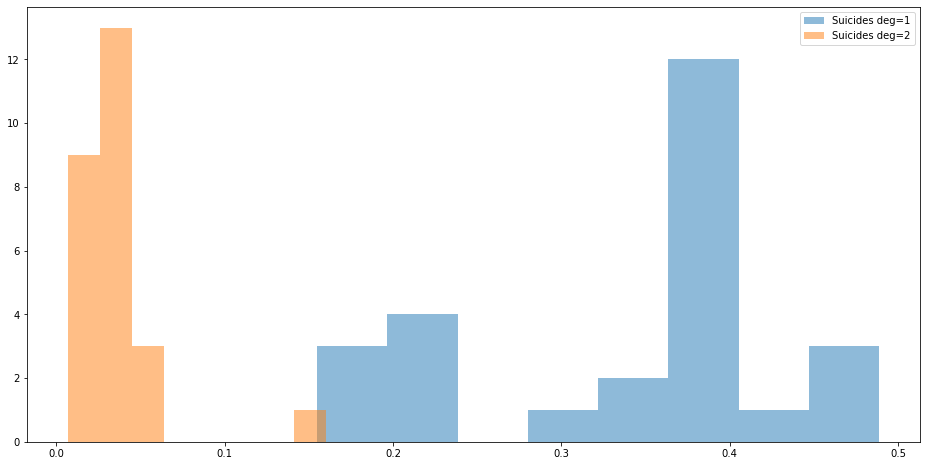

In [66]:
plt.figure(figsize=(16, 8))
bins = 8

plt.hist(V[1], bins, alpha=0.5, label='Suicides deg=1')
plt.hist(VV[1], bins, alpha=0.5, label='Suicides deg=2')
plt.legend()
plt.show()

Maybe is it an interesting idea to give a number to each city that is based on the growth of its number, the paper from Pietro (https://www.frontiersin.org/articles/10.3389/fphy.2022.858307/full) considers this phenomena.

The ratio of increase of cities over timeshould be taken to calculate this ratio as well as the current size of the city.

### GC = Current_Size*(d/dt(Neigbhooring cities population)) [vector quantity]

The **Neigbhooring cities population**, is dependent on the number of neighboor cities, so I propose a vector of average ratio growth is created with the size of number of neighboors and therefore then multiplied coordinate by coordinate by the current size of the considering city. Then an average of this vector should be calculated.

<AxesSubplot:>

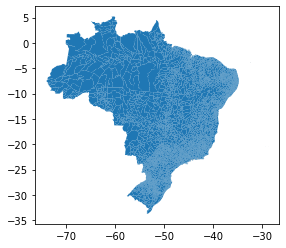

In [67]:
fp = "Brasil-Municipios-2021/BR_Municipios_2021.shp"
mapaBR = gpd.read_file(fp)
mapaBR.plot()

In [68]:
# add NEIGHBORS column
mapaBR["NEIGHBORS"] = None  

for index, country in mapaBR.iterrows():   

    # get 'not disjoint' countries
    neighbors = mapaBR[~mapaBR.geometry.disjoint(country.geometry)].NM_MUN.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.NM_MUN != name ]

    # add names of neighbors as NEIGHBORS value
    mapaBR.at[index, "NEIGHBORS"] = ", ".join(neighbors)
# save GeoDataFrame as a new file
mapaBR.to_file("vizinhosBR.shp")

## Ideia Hygor 18/11/2022
Para um ano, cada cidade é um par x,y (populacao, suicidio/homicidio). Ordene os pares do menor para o maior x e plota a soma acumulada de x e y nessa ordem.
Ou seja, vc deve ter um plot np.cumsum(x) vs np.cumsum(y). Mas é importante eles serem sorted antes de calcular o cumsum. 

O raciocio por trás é que isso funciona como se fosse uma especie de integral. Suponha que y = a*x^b + erro, em que erro = noise não correlacionado. 

Então:

$$Y = \int_0^X y dx = \int_0^X a*x^b dx +  \int_0^X erro dx$$

Se o erro nao for correlacionado a ultima integral/soma é zero. Então 

$$Y=(a/ (b+1)) * X^{(b+1)}$$

Em teoria o grafico vai ficar bem mais limpo e deve dar uma boa linha reta. Mas só testando para saber :D   


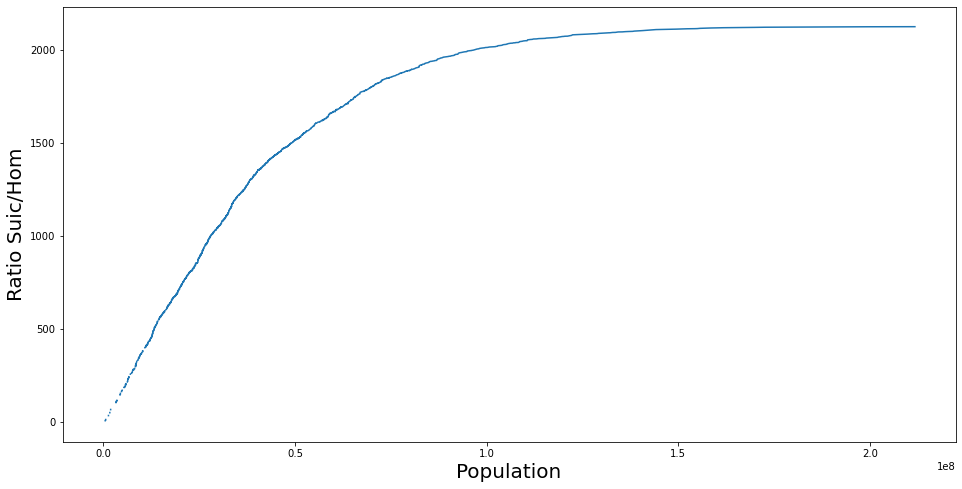

In [222]:
years = [col[:-2] for col in P.columns]
vals=[]
for year in years:
    vals.append((DB[year+"_p"],DB[year+"_s"]/DB[year+"_h"]))


PAIRS = pd.DataFrame(vals[25], index = ["Population", "Ratio"]).sort_values(by="Population", axis = 1, ascending=True)
PAIRS=PAIRS.droplevel([1,2], axis=1) 



PAIRScum = PAIRS.cumsum(axis = 1, skipna = True)

PopCumSum = list(PAIRScum.iloc[0])
RatioCumSum = list(PAIRScum.iloc[1])
#zz[:-33]
PopCumSum[-1]
RatioCumSum[-1]

for k in range(len(PopCumSum)):
    if math.isnan(PopCumSum[k]):
        PopCumSum[k] = PopCumSum[k-1]
        RatioCumSum[k] = RatioCumSum[k-1]


plt.figure(figsize=(16, 8))
plt.plot(PopCumSum,RatioCumSum)
plt.xlabel('Population', size=20)
plt.ylabel('Ratio Suic/Hom', size=20)
plt.show()
